# Homework 1

This homework contains two parts, Part 1 on Linear Regression and Part 2 on Logistic Regression. Both parts use real world data and will introduce you to techniques used in the workforce! As a reminder, DO NOT edit anything in this python notebook! All of your code will be contained in the functions located in answers.py. You should be able to complete this assignment with no extra imports so please use what we have given you.

Some functions you may want to take note of before you start:
- Pandas .corr() function to calculate correlation
- Pandas .mean(), .median(), .std() functions
- Pandas mapping a lambda function eg .map(lambda x: x)
- ' '.join(x) function where x is a list
- sklearn train_test_split() function
- Python strings .isalpha() function
- sklearns confusion_matrix() function
- Pandas .plot() function
- statsmodels .summary() function
- numpy .linspace() function
- scipy norm.fit(), norm.pdf() functions
- statsmodels qqplot() function
- statsmodels .predict() function
- random.normal() function

Make sure you have all of the packages installed, if you do not use this command: "pip install pandas numpy sklearn matplotlib statsmodels nltk scipy"

In [50]:
# Import all of the necessary packages
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from numpy import random
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from scipy.stats import norm
import nltk
from statsmodels.graphics.gofplots import qqplot

from answers import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Linear Regression - Part 1
Part 1 of the homework will focus applying Linear Regression to real world data. 
<br>
McDonald's is a global fast food chain that serves hamburgers in 119 different countries. McDonald's flagship hamburger is the Big Mac. Just like all other things in this world, the cost of the Big Mac fluctuates with the enconomy, however, the Big Mac is in a unique position by its presence in over half of the worlds countries. Through this exercise we will use linear regression to see if global markets data can be used to predict the cost of a Big Mac.

This is part one of the coding assignment, it will go through cleaning the data we have provided to you and then training a linear regression model on this data to predict the dollar_price variable. The columns in this dataset we will be concerned with are local_price (the price of the big mac in native currency), dollar_ex (the exchange rate of the dollar from that native currency), the dollar_price (the converted dollar value of a big mac), GDP_dollar (the GDP of the dollar at sample time), adj_price (the adjusted big mac price), and USD, EUR, GBP, JPY, and CNY (the values of various world currencies)

In [51]:
# Read in the county data as a pandas DataFrame
bmdf = pd.read_csv("big-mac-adjusted-index.csv")
bmdf

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_dollar,adj_price,USD,EUR,GBP,JPY,CNY
0,2011-07-01,ARG,ARS,Argentina,20.00,4.132500,4.839685,9138.177,3.149757,1.01089,0.47526,0.84970,0.90626,0.94622
1,2011-07-01,AUS,AUD,Australia,4.56,0.922382,4.943724,55589.549,5.792526,0.11695,-0.18056,0.02742,0.05883,0.08103
2,2011-07-01,BRA,BRL,Brazil,9.50,1.541600,6.162429,10816.487,3.245241,1.48516,0.82320,1.28595,1.35584,1.40524
3,2011-07-01,GBR,GBP,Britain,2.39,0.614137,3.891637,36119.846,4.684831,0.08714,-0.20243,0.00000,0.03058,0.05218
4,2011-07-01,CAN,CAD,Canada,4.73,0.945850,5.000793,46214.914,5.259173,0.24443,-0.08704,0.14468,0.17968,0.20441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,2021-07-01,UKR,UAH,Ukraine,65.00,27.220000,2.387950,3653.110,3.063007,-0.25112,-0.31414,-0.25869,-0.00960,-0.24829
808,2021-07-01,ARE,AED,United Arab Emirates,14.75,3.673150,4.015627,31982.230,4.183747,-0.07801,-0.15560,-0.08734,0.21933,-0.07453
809,2021-07-01,USA,USD,United States,5.65,1.000000,5.650000,63415.990,5.427311,0.00000,-0.08415,-0.01012,0.32250,0.00378
810,2021-07-01,URY,UYU,Uruguay,225.00,44.000000,5.113636,15777.960,3.542683,0.38654,0.26986,0.37252,0.83371,0.39178


In [52]:
# Note the columns that are present, which ones we will be using as independent, and that the dependent column is dollar_price
indepCols = ['local_price', 'dollar_ex', 'GDP_dollar', 'adj_price', 'USD', 'EUR', 'GBP', 'JPY', 'CNY']
depCol = 'dollar_price'
bmdf.columns

Index(['date', 'iso_a3', 'currency_code', 'name', 'local_price', 'dollar_ex',
       'dollar_price', 'GDP_dollar', 'adj_price', 'USD', 'EUR', 'GBP', 'JPY',
       'CNY'],
      dtype='object')

In [53]:
# Take a look at some of the attributes of our DataFrame and become familiar with the data
bmdf.describe()

,local_price,dollar_ex,dollar_price,GDP_dollar,adj_price,USD,EUR,GBP,JPY,CNY
count,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000
mean,1449.884729,520.581191,3.640633,25536.976782,3.720229,-0.024053,-0.094143,0.008053,0.223710,0.020544
std,6014.198852,2331.513241,1.268918,22651.269196,0.961036,0.248176,0.207514,0.240192,0.299500,0.250122
min,1.100000,0.300800,0.000000,1049.749000,2.327804,-0.577540,-0.583190,-0.590290,-0.456930,-0.554550
25%,9.100000,2.999250,2.645835,7182.227750,2.977383,-0.186152,-0.226205,-0.138513,0.010437,-0.140245
50%,28.000000,7.750875,3.475848,14812.563500,3.341639,-0.033465,-0.099610,0.000000,0.200835,0.008645
75%,119.250000,45.678125,4.425070,41611.455250,4.424376,0.094757,0.015550,0.145228,0.388023,0.141170
max,69000.000000,23064.000000,8.311708,100578.968000,7.434129,1.485160,0.823200,1.285950,1.621070,1.405240


In [54]:
# 1.1 (2 pts.) 
# Edit the python function in answers.py to find all of the rows where dollar_price is zero and return that DataFrame
# RETURN: Modified DataFrame
findZeroDollarPrice(bmdf)

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_dollar,adj_price,USD,EUR,GBP,JPY,CNY
30,2011-07-01,KOR,KRW,South Korea,3700.00,1056.20000,0.0,20590.962,3.801343,0.20606,-0.11520,0.10938,0.14330,0.16727
82,2012-07-01,CZE,CZK,Czech Republic,70.33,21.04800,0.0,18288.284,3.400976,0.05660,-0.04853,-0.01535,0.07136,0.12299
118,2013-01-01,CZE,CZK,Czech Republic,70.33,18.89495,0.0,20435.875,3.673327,0.13714,-0.05680,0.06912,0.38210,0.18662
175,2013-07-01,SGP,SGD,Singapore,4.70,1.27470,0.0,49270.872,4.755838,-0.19767,-0.27347,-0.16882,0.11827,-0.14220
635,2020-01-14,COL,COP,Colombia,11900.00,3287.62500,0.0,6641.507,2.941459,0.10187,0.13275,0.20161,0.45203,0.20311


In [55]:
# 1.2 (1 pts.)
# It is invalid for a Big Mac to be free (dollar_price = zero) so we will replace the dollar price with NaN (similar to null or 
# None) use the replace method to replace 0 in the dollar_price column with np.NaN. We do this so the invalid values will not 
# mess with our mean, median, or standard deviation metrics when replacing these invalid values.
# RETURN: Modified DataFrame
bmdf = replaceZeroWithNaN(bmdf)

In [56]:
# Lets make a test copy for our DataFrame and test a few ways we could try to fix the dollar price NaN values.
# Note that pandas is smart, NaN will not be factored into any sort of mean, median, std calculations so we don't have to worry
# about this messing with our experiments.
bmdfTest = bmdf.copy()

In [57]:
# Here we define a function to print the Mean, Standard Deviation, and Median. Note the shortcuts you can use to calculate these
# values for a column. We will use this function to show how different handelings of NaN values can influence our dataset, for
# example printed from this cell is the metrics for dollar_price if NaN was not counted at all.
def printMeanStdMedian(bmdfTest):
    print(f'mean: {bmdfTest["dollar_price"].mean()}, std: {bmdfTest["dollar_price"].std()}, median:{bmdfTest["dollar_price"].median()}')
printMeanStdMedian(bmdfTest)

mean: 3.663189523414681, std: 1.239922830725977, median:3.49059595298967


In [58]:
# 1.3 (1 pts.) 
# Fill in the function replaceNaNWithZero that will replace the dollar_price NaN values with zero
# RETURN: Modified DataFrame
bmdfTest = replaceNaNWithZero(bmdfTest)
printMeanStdMedian(bmdf)
bmdfTest = bmdf.copy()

mean: 3.663189523414681, std: 1.239922830725977, median:3.49059595298967


In [59]:
# 1.4 (1 pts.) 
# Fill in the function replaceNaNWithMean that will replace the dollar_price NaN values with the dollar_price mean
# RETURN: Modified DataFrame
bmdfTest = replaceNaNWithMean(bmdfTest)
printMeanStdMedian(bmdfTest)
bmdfTest = bmdf.copy()

3.663189523414681
mean: 3.6631895234146805, std: 1.2360947177589992, median:3.500932326945115


In [60]:
# 1.5 (1 pts.) 
# Fill in the function replaceNaNWithMedian that will replace the dollar_price NaN values with the dollar_price median 
# RETURN: Modified DataFrame
bmdfTest = replaceNaNWithMedian(bmdfTest)
printMeanStdMedian(bmdfTest)
bmdfTest = bmdf.copy()

mean: 3.6621267551238863, std: 1.2361685457696439, median:3.49059595298967


In [61]:
# 1.6 (2 pts.) 
# Fill in the function replaceNaNWithNormal that will replace the dollar_price NaN values with random samples from a normal
# distribution with the same mean and standard deviation as dollar_price
# (hint: use random.normal() to generate values to replace the NaN values)
# RETURN: Modified DataFrame
bmdfTest = replaceNaNWithNormal(bmdfTest)
printMeanStdMedian(bmdfTest)
bmdfTest = bmdf.copy()

mean: 3.650470752711973, std: 1.2466240650708997, median:3.47584836674758


In [62]:
# Lets say we have decided on filling our invalid values with the mean
bmdf = replaceNaNWithMean(bmdf)
printMeanStdMedian(bmdf)

3.663189523414681
mean: 3.6631895234146805, std: 1.2360947177589992, median:3.500932326945115


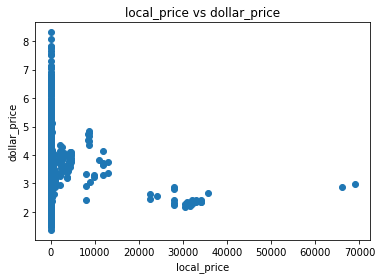

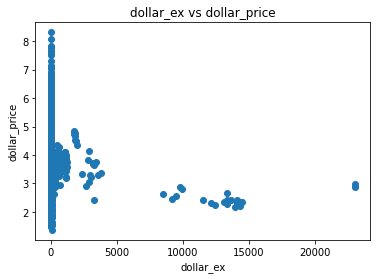

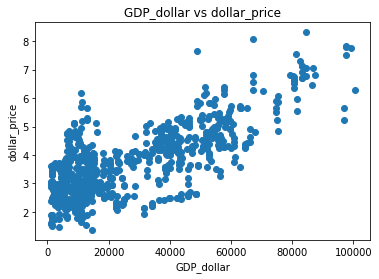

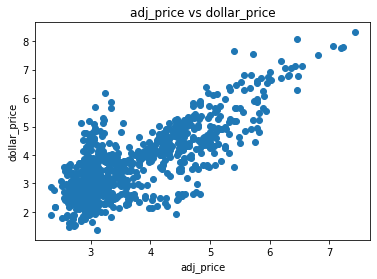

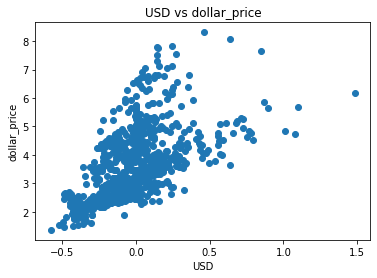

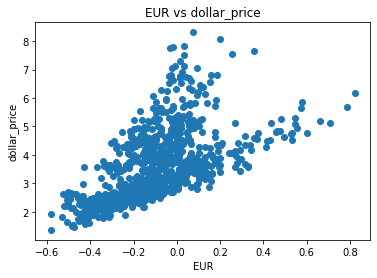

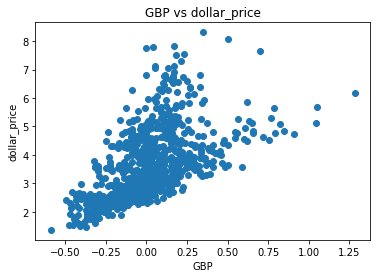

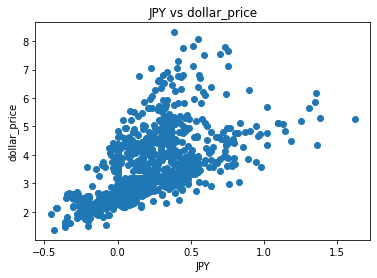

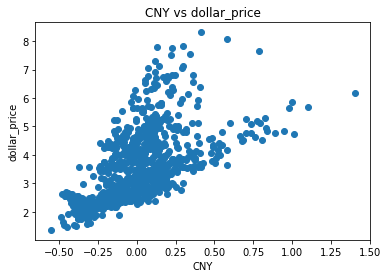

In [63]:
# 1.7 (3 pts.)
# To get a better idea of our data, we now want to graph scatter plots of each independent variable vs our 
# dependent variable dollar_price. Fill out the function graphIndepVsDep by graphing each independent variable against
# dollar_price. Set a title for each graph and label the x and y axis. 
# Make sure to display the plots below this cell
# RETURN: Nothing, display graphs
graphIndepVsDep(bmdf, indepCols)

In [64]:
# 1.8 (1 pts.) 
# Interesting... there seems to be two points in particular with a significantly higher (>60,000) local_price. Fill in the
# localPriceOutlier function to return the two points rows as a dataframe.
# RETURN: DataFrame with outliers
localPriceOutlier(bmdf)

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_dollar,adj_price,USD,EUR,GBP,JPY,CNY
756,2021-01-01,VNM,VND,Vietnam,66000.0,23064.0,2.861602,3416.232,3.002480,-0.07421,-0.1780,-0.01747,0.14418,-0.09642
811,2021-07-01,VNM,VND,Vietnam,69000.0,23028.5,2.996287,3498.980,3.056909,-0.05846,-0.1377,-0.06799,0.24518,-0.05491


In [65]:
# 1.9 (1 pts.)
# There seems to be a similar occurance with the dollar_ex variable, fill out the dollarExOutliers function to output all
# the information about rows with more than 20,000 dollar_ex
# RETURN: DataFrame with outliers
dollarExOutliers(bmdf)

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_dollar,adj_price,USD,EUR,GBP,JPY,CNY
756,2021-01-01,VNM,VND,Vietnam,66000.0,23064.0,2.861602,3416.232,3.002480,-0.07421,-0.1780,-0.01747,0.14418,-0.09642
811,2021-07-01,VNM,VND,Vietnam,69000.0,23028.5,2.996287,3498.980,3.056909,-0.05846,-0.1377,-0.06799,0.24518,-0.05491


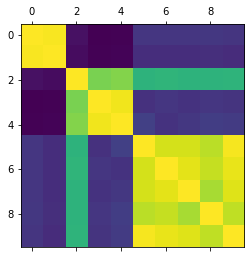

In [66]:
# 1.10 (3 pts.) 
# Lets check the correlation between all of our numeric variables. Fill in the function correlationHeatmap that will calculate
# the correlation matrix of all our variables and then graph them as a heatmap. 
# Make sure to display the plot below this cell
# RETURN: Nothing, display a graph
correlationHeatmap(bmdf)

In [23]:
# 1.11 (3 pts.) 
# Now lets do some Linear Regression! Fill in the linearRegressionFit function using the ols and fit function from statsmodels.
# Use GDP_dollar and USD as independent variables and dollar_price as the dependent variable.
# Print the model summary as part of the linearRegressionFit function. linearRegressionFit should return the fitted model.
# RETURN: Linear Regression model
model = linearRegressionFit(bmdf)

                            OLS Regression Results                            
Dep. Variable:           dollar_price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     5562.
Date:                Wed, 26 Jan 2022   Prob (F-statistic):               0.00
Time:                        22:10:38   Log-Likelihood:                -231.13
No. Observations:                 812   AIC:                             468.3
Df Residuals:                     809   BIC:                             482.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6563      0.017    155.650      0.0

In [24]:
# Notice the actual weights assigned to our parameters
model.params

Intercept     2.656314
GDP_dollar    0.000042
USD           2.970923
dtype: float64

In [25]:
# Notice the p values assigned to our parameters, they are low because both variables have a significant effect on the model
model.pvalues

Intercept     0.0
GDP_dollar    0.0
USD           0.0
dtype: float64

In [26]:
# We can even look at the rsquared value
model.rsquared

0.9322061412660286

In [27]:
# Now we will add the residuals to our bmdf DataFrame for further analysis
bmdf['residual']=model.resid
bmdf

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_dollar,adj_price,USD,EUR,GBP,JPY,CNY,residual
0,2011-07-01,ARG,ARS,Argentina,20.00,4.132500,4.839685,9138.177,3.149757,1.01089,0.47526,0.84970,0.90626,0.94622,-1.205778
1,2011-07-01,AUS,AUD,Australia,4.56,0.922382,4.943724,55589.549,5.792526,0.11695,-0.18056,0.02742,0.05883,0.08103,-0.407390
2,2011-07-01,BRA,BRL,Brazil,9.50,1.541600,6.162429,10816.487,3.245241,1.48516,0.82320,1.28595,1.35584,1.40524,-1.362924
3,2011-07-01,GBR,GBP,Britain,2.39,0.614137,3.891637,36119.846,4.684831,0.08714,-0.20243,0.00000,0.03058,0.05218,-0.548777
4,2011-07-01,CAN,CAD,Canada,4.73,0.945850,5.000793,46214.914,5.259173,0.24443,-0.08704,0.14468,0.17968,0.20441,-0.333197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,2021-07-01,UKR,UAH,Ukraine,65.00,27.220000,2.387950,3653.110,3.063007,-0.25112,-0.31414,-0.25869,-0.00960,-0.24829,0.323436
808,2021-07-01,ARE,AED,United Arab Emirates,14.75,3.673150,4.015627,31982.230,4.183747,-0.07801,-0.15560,-0.08734,0.21933,-0.07453,0.240578
809,2021-07-01,USA,USD,United States,5.65,1.000000,5.650000,63415.990,5.427311,0.00000,-0.08415,-0.01012,0.32250,0.00378,0.315852
810,2021-07-01,URY,UYU,Uruguay,225.00,44.000000,5.113636,15777.960,3.542683,0.38654,0.26986,0.37252,0.83371,0.39178,0.642694


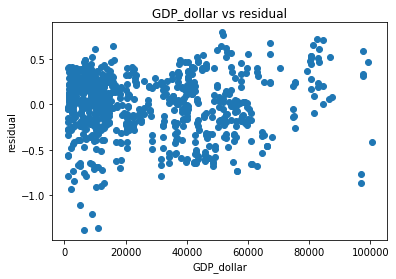

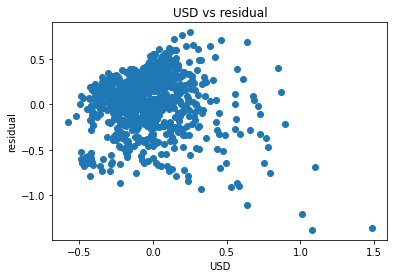

In [28]:
# 1.12 (3 pts.) 
# We would like to see how our independent variables relate to the residuals, fill out the function graphIndepVsResidual
# to generate a scatter plot for each independent variable passed in where the residuals are on the y axis and the independent
# variable is on the x axis. Make sure to include a title as well as labels for the x and y axis. 
# Make sure to display the plots below this cell
# RETURN: Nothing, display a graph
graphIndepVsResidual(bmdf, ['GDP_dollar', 'USD'], model)

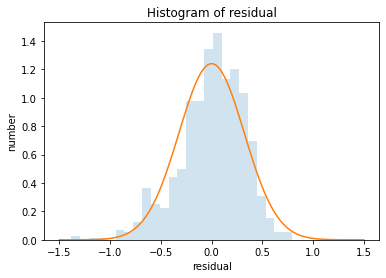

In [29]:
# 1.13 (5 pts.) 
# Fill in the function histOfResiduals to generate a histogram of the residuals and overlay a normal curve on top of this
# histogram. Us norm.fit, np.linspace and norm.pdf to generate the data for a normal curve and make sure to set density=True 
# when plotting the histogram. Be sure to title your plot as well as label the x and y axis
# Make sure to display the plot below this cell
# RETURN: Nothing, display a graph
histOfResiduals(bmdf)

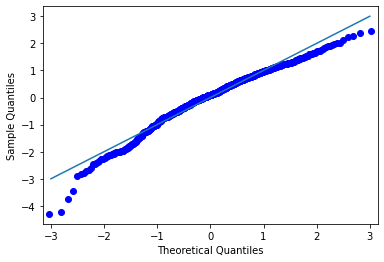

In [30]:
# 1.14 (3 pts.) 
# Using the qqplot function imported from statsmodels graph the QQ Plot of the model residuals with a 45 degree line (you can
# add such a line in the arguments of the qqplot function, make sure to set fit=True)
# Make sure to display the plot below this cell
# RETURN: Nothing, display a graph
graphQQPlot(model)

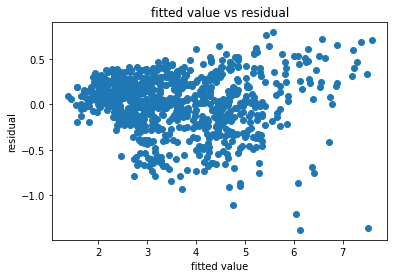

In [31]:
# 1.15 (3 pts.) 
# Using the model, access the fitted values and residual values to fill in the graphFittedVsResidual which graphs a scatter
# plot of fitted values on the x axis vs residual values on the y axis. Make sure to add a title and label the x and y axis
# Make sure to display the plot below this cell
# RETURN: Nothing, display a graph
graphFittedVsResidual(model)

In [32]:
# 1.16 (2 pts.) 
# Using the model.predict function to fill out the predictLinearRegression function that takes in the model, prints out the
# data that you are predicting and the predicted value. 
# RETURN: Floating point predicted number
predictLinearRegression(model, 1000, 2)

8.640387229757986

## Logistic Regression - Part 2
In this section we will be predicting whether a movie review from IMDB is positive or negative using logistic regression! The IMDB movie review dataset is a popular sentiment analysis dataset that is used in many parts of machine learning. To keep this assignment manageable, we have provided a subset of 6,000 movie reviews as well as their associated labels positive (1) and negative (0) in imdbReviews.csv. These labels were made and validated by humans so we accept them as a ground truth. 

In [33]:
# Download the corpus
df = pd.read_csv('imdbReviews.csv')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [34]:
# This cell will give you a random row from our DataFrame, feel free to run it as many times as you like to get a feel for 
# what is generally labeled as negative and what is considered positive.
sample = df.sample()
print(f'Score: {sample["label"].values[0]}\n\nText: {sample["text"].values[0]}')


Score: 1

Text: Since musicals have both gone out of fashion and are incredibly expensive to make without all the talent needed to make one under contract to a studio, I doubt we will ever get a real life story of Enrico Caruso. <br /><br />But if everything else was in place it was no accident that no Hollywood studio attempted the task until Metro-Goldwyn-Mayer had Mario Lanza under contract. No one else could have done it, I doubt whether it will ever be tried again.<br /><br />And why should it. I think Enrico Caruso himself would have been satisfied as to how his singing was portrayed on screen. For his tenor voice was his life, his reason for being on the earth. <br /><br />To say that liberties were taken with his life is to be modest. Caruso, like the man who portrayed him, was a man of large appetites although with a lot more self discipline. He had numerous relationships with several women and fathered two out of wedlock sons who are not in this film. <br /><br />His contribu

In [36]:
# 2.1 (3 pts.)
# Now we need to edit the text so that it will be simpler for us to vectorize it and run logistic regression. The first
# modification we will make is sending all of the text to lower case. Fill out the lowerCase function and return the
# DataFrame with all of the text in lower case. (Hint: the map function in pandas may be helpful)
# RETURN : the modified DataFrame, make all edits within the text column
df = lowerCase(df)
df

,text,label
0,bromwell high is a cartoon comedy. it ran at t...,1
1,homelessness (or houselessness as george carli...,1
2,brilliant over-acting by lesley ann warren. be...,1
3,this is easily the most underrated film inn th...,1
4,this is not the typical mel brooks film. it wa...,1
...,...,...
5995,the movie is an extra-long tale of a classic n...,0
5996,the year 1934 was when shirley temple played t...,0
5997,"having grown up in texas, and less than 15 mil...",0
5998,"first, before reading further, you must unders...",0


In [37]:
# 2.2 (3 pts.) 
# Next, we are going to tokenize our text so we can filter out unwanted pieces of the sentence. Fill out the tokenizeDF function
# so that all of the text is tokenized using word_tokenize(). (Hint: the map function in pandas may be helpful)
# RETURN : the modified DataFrame, make all edits within the text column
df = tokenizeDF(df)
df

,text,label
0,"[bromwell, high, is, a, cartoon, comedy, ., it...",1
1,"[homelessness, (, or, houselessness, as, georg...",1
2,"[brilliant, over-acting, by, lesley, ann, warr...",1
3,"[this, is, easily, the, most, underrated, film...",1
4,"[this, is, not, the, typical, mel, brooks, fil...",1
...,...,...
5995,"[the, movie, is, an, extra-long, tale, of, a, ...",0
5996,"[the, year, 1934, was, when, shirley, temple, ...",0
5997,"[having, grown, up, in, texas, ,, and, less, t...",0
5998,"[first, ,, before, reading, further, ,, you, m...",0


In [38]:
# 2.3 (4 pts.) 
# Now, we are going to filter through the tokenized text and in each row removing all of the stop words.
# Fill out the removeStop function to do this and return the modified DataFrame. We also pass in a set of stop words
# in english.
# RETURN : the modified DataFrame, make all edits within the text column
stopeng = set(stopwords.words('english'))
df = removeStop(df, stopeng)
df

,text,label
0,"[bromwell, high, cartoon, comedy, ., ran, time...",1
1,"[homelessness, (, houselessness, george, carli...",1
2,"[brilliant, over-acting, lesley, ann, warren, ...",1
3,"[easily, underrated, film, inn, brooks, cannon...",1
4,"[typical, mel, brooks, film, ., much, less, sl...",1
...,...,...
5995,"[movie, extra-long, tale, classic, novel, comp...",0
5996,"[year, 1934, shirley, temple, played, three, m...",0
5997,"[grown, texas, ,, less, 15, miles, used, gille...",0
5998,"[first, ,, reading, ,, must, understand, 'm, n...",0


In [39]:
# 2.4 (4 pts.) 
# Now, we are going to filter through the tokenized text and in each row only keeping words that have any
# alphabetic characters in them, and removing any tokens that are of size 0 or 1.
# Fill out the removeStopKeepAlpha function to do this and return the modified DataFrame. We also pass in a set of stop words
# in english.
# RETURN : the modified DataFrame, make all edits within the text column
df = keepAlpha(df)
df

,text,label
0,"[bromwell, high, cartoon, comedy, ran, time, p...",1
1,"[homelessness, houselessness, george, carlin, ...",1
2,"[brilliant, over-acting, lesley, ann, warren, ...",1
3,"[easily, underrated, film, inn, brooks, cannon...",1
4,"[typical, mel, brooks, film, much, less, slaps...",1
...,...,...
5995,"[movie, extra-long, tale, classic, novel, comp...",0
5996,"[year, shirley, temple, played, three, major, ...",0
5997,"[grown, texas, less, miles, used, gilley, 's, ...",0
5998,"[first, reading, must, understand, 'm, neo-naz...",0


In [40]:
# 2.5 (3 pts.) 
# Lastly, we will join all of the tokenized words per row back into single strings. Fill out the joinText function to join
# your tokenized words together and return the new DataFrame
# RETURN : the modified DataFrame, make all edits within the text column 
df = joinText(df)
df

,text,label
0,bromwell high cartoon comedy ran time programs...,1
1,homelessness houselessness george carlin state...,1
2,brilliant over-acting lesley ann warren best d...,1
3,easily underrated film inn brooks cannon sure ...,1
4,typical mel brooks film much less slapstick mo...,1
...,...,...
5995,movie extra-long tale classic novel completely...,0
5996,year shirley temple played three major movies ...,0
5997,grown texas less miles used gilley 's tell mov...,0
5998,first reading must understand 'm neo-nazi 'm t...,0


In [41]:
# 2.6 (4 pts.)
# We need to vectorize our new text so that we can use it as input for the logistic regression. Fill in the function
# countVectorize to turn our DataFrame df into a matrix X which has the shape (num of examples, vocabulary size) and array
# y which has the shape (num of examples). Use the CountVectorizer method to achieve this.
# RETURN: X, y, and vectorizer
X, y, vectorizer = countVectorize(df)
print(X)
print(y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[1 1 1 ... 0 0 0]


In [42]:
# 2.7 (3 pts.) 
# Fill in the function splitData using the train_test_split function to get a test size of .25 and set the random state to 42.
X_train, X_test, y_train, y_test = splitData(X, y)
print(f'XTrain length: {len(X_train)}, XTest length: {len(X_test)}, YTrain length: {len(y_train)}, YTest length: {len(y_test)}')

XTrain length: 4500, XTest length: 1500, YTrain length: 4500, YTest length: 1500


In [43]:
# Here we make sure our variables are all of the correct type.
y_test = y_test.astype(int)
y_train = y_train.astype(int)

X_test = X_test.astype(int)
X_train = X_train.astype(int)

In [44]:
# 2.8 (4 pts.) 
# Fill in the function trainLogisticRegression by creating a LogisticRegression object with a random state of 42 and then
# fitting that object to X_train and y_train. Then return the score when we try to predict on our test set. If you get a 
# convergence warning it's fine, we could modify some hyperparameters here however its generally not neccessary for our simple
# task.
# RETURN: the model (clf), the accuracy as a decimal number for example 0.633
clf, accuracy = trainLogisticRegression(X_train, X_test, y_train, y_test)
print(accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8773333333333333


In [45]:
# 2.9 (4 pts.)
# Fill in the scoreTest function to vectorize and evaluate the prediction as well as confidence scores in the prediction given
# any text. You may want to go through the sklearn LogisticRegression documents found here:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# to come up with an answer.
# RETURN: predicted label (score), predicted confidence interval (confidence) both as decimal numbers
text = 'I love the work you are doing'
score, confidence = scoreText(clf, vectorizer, text)
print(f'Score: {score} with confidence: {confidence}')

Score: 1 with confidence: 0.8274548303459521


In [46]:
text = 'I do not love this movie'
score, confidence = scoreText(clf, vectorizer, text)
print(f'Score: {score} with confidence: {confidence}')

Score: 1 with confidence: 0.2722602581536058


In [47]:
# 2.10 (3 pts.) 
# Similar to countVectorize, use the TfidfVectorizer to vectorize our data using the TfIdf method.
# RETURN: X, y with the same shapes as countVectorize
X, y, vectorizer = tfidfVectorize(df)
print(X)
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[1 1 1 ... 0 0 0]


In [48]:
# Here we re-run the training process to see how TfIdf compares to a simple frequency binning. No modifications necessary.
X_train, X_test, y_train, y_test = splitData(X, y)
print(f'XTrain length: {len(X_train)}, XTest length: {len(X_test)}, YTrain length: {len(y_train)}, YTest length: {len(y_test)}')

clf, accuracy = trainLogisticRegression(X_train, X_test, y_train, y_test)
print(accuracy)

XTrain length: 4500, XTest length: 1500, YTrain length: 4500, YTest length: 1500
0.8913333333333333


## Extra Space 
Make new cells after here if you need extra space to answer analysis questions or think about problems